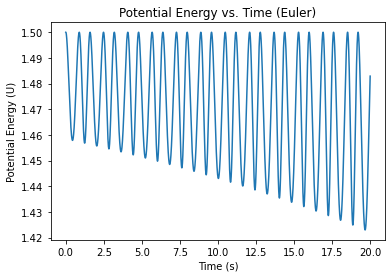

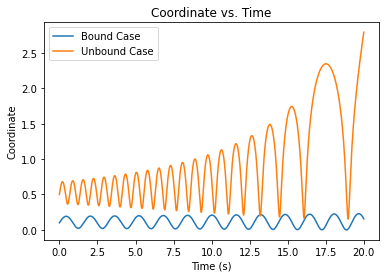

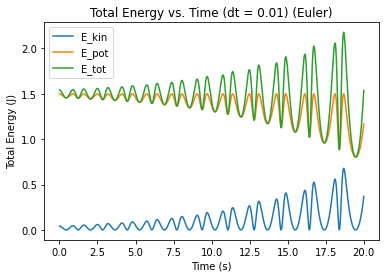

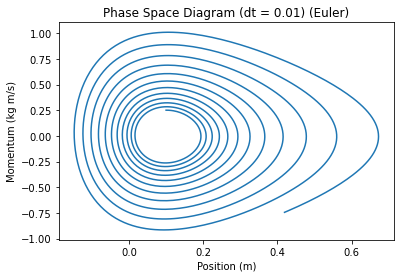

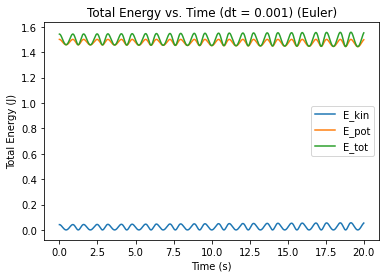

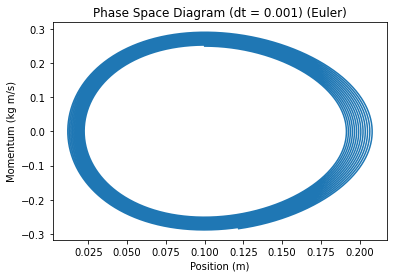

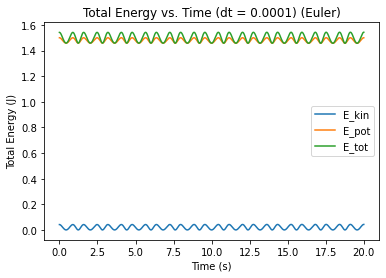

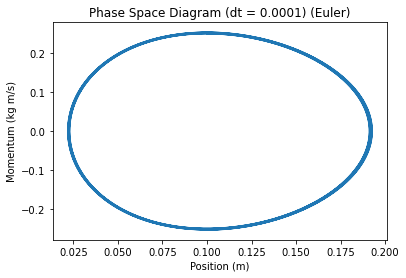

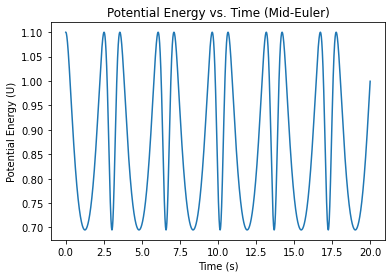

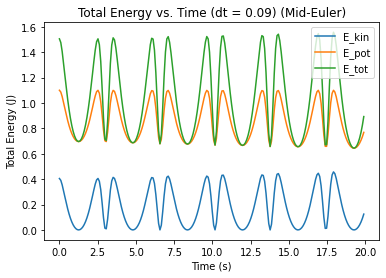

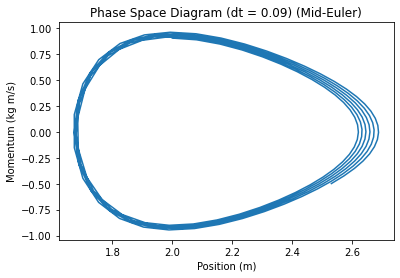

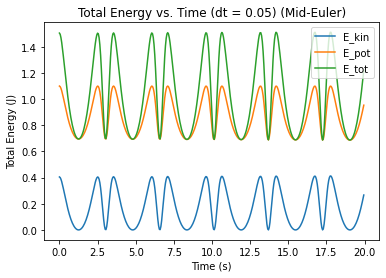

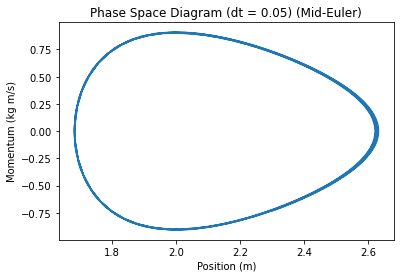

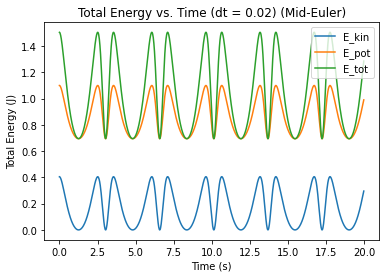

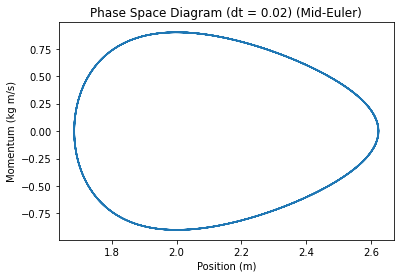

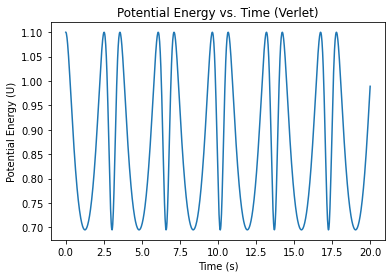

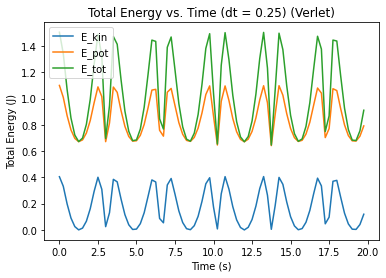

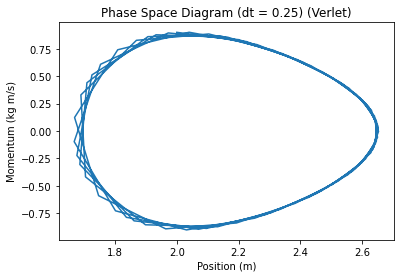

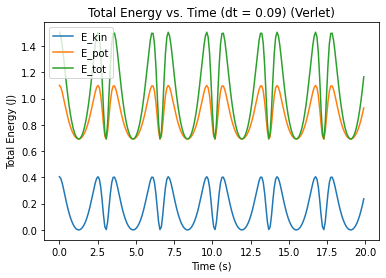

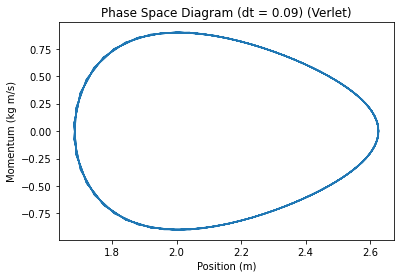

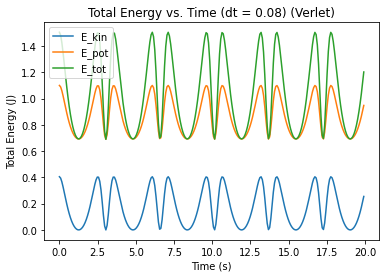

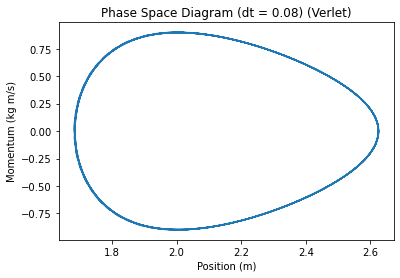

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass)
    p_new = p + f * dt
    
    return q_new, p_new


def energy_and_force(q, q0, D, alpha):
   """
   U(q) = D * [ exp(-2*alpha*(q-q0)) - 2*exp(-alpha*(q-q0)) ]
   F = -dU/dq = -2*D*alpha*[ exp(-2*alpha*(q-q0)) - exp(-alpha*(q-q0)) ]
   """
   
   exp1 = np.exp(-2*alpha*(q-q0))
   exp2 = np.exp(-alpha*(q-q0))
   
   energy = D * (exp1 - 2*exp2)
   force = -2*D*alpha*(exp1 - exp2)
    
   return energy, force


def md(x0, p0, mass, q0, D, alpha, dt, nsteps):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    k - force constant of the potential
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(x, q0, D, alpha)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = time_step(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot  


# Parameters 
q0 = 0.1
D = -1.5
alpha = 2.0
mass = 0.75
nsteps = 10000
t_max = 20.0
dt = t_max / nsteps
x0 = q0
p0 = 0.25
X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)

# Plot the potential energy
plt.plot(T, E_pot)
plt.xlabel('Time (s)')
plt.ylabel('Potential Energy (U)')
plt.title('Potential Energy vs. Time (Euler)')
plt.show()

# Unbound 
q1 = 0.5
D1 = -9.0
alpha1 = 2.0
nsteps = 10000
t_max = 20.0
dt = t_max / nsteps
x1 = q1
p1 = 1.1
X1, P1, T1, E_pot1, E_kin1, E_tot1 = md(x1, p1, mass, q1, D1, alpha1, dt, nsteps)

# Plot the potential energy
plt.plot(T, X, label='Bound Case')
plt.plot(T, X1, label='Unbound Case')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Coordinate')
plt.title('Coordinate vs. Time')
plt.show()

# Different dt values
dt_values = [0.01, 0.001, 0.0001]

# Plot total energy and phase space diagrams
for dt in dt_values:
    nsteps = int(t_max / dt)
    
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)
    
    fig, ax = plt.subplots()
    plt.plot(T, E_kin, label="E_kin")
    plt.plot(T, E_pot, label="E_pot")
    plt.plot(T, E_tot, label="E_tot")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Total Energy (J)')
    ax.set_title('Total Energy vs. Time (dt = {}) (Euler)'.format(dt))
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(X, P)
    ax.set_xlabel('Position (m)')
    ax.set_ylabel('Momentum (kg m/s)')
    ax.set_title('Phase Space Diagram (dt = {}) (Euler)'.format(dt))
    plt.show()

"""
@author: Kosar Yasin
"""
import numpy as np
import matplotlib.pyplot as plt

def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    p_mid = p + 0.5 * f * dt
    q_mid = q + 0.5 * p / mass * dt

    e_pot_mid, f_mid = energy_and_force(q_mid, q0, D, alpha)

    p_new = p + f_mid * dt
    q_new = q + p_mid / mass * dt
    
    return q_new, p_new 


def energy_and_force(q, q0, D, alpha):
   """
   U(q) = D * [ exp(-2*alpha*(q-q0)) - 2*exp(-alpha*(q-q0)) ]
   F = -dU/dq = -2*D*alpha*[ exp(-2*alpha*(q-q0)) - exp(-alpha*(q-q0)) ]
   """
   
   exp1 = np.exp(-2*alpha*(q-q0))
   exp2 = np.exp(-alpha*(q-q0))
   
   energy = D * (exp1 - 2*exp2)
   force = -2*D*alpha*(exp1 - exp2)
    
   return energy, force


def md(x0, p0, mass, q0, D, alpha, dt, nsteps):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    k - force constant of the potential
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(x, q0, D, alpha)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = time_step(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot  


# Parameters 
q0 = 2.0
D = -1.1
alpha = 1.5
mass = 1.0
nsteps = 10000
t_max = 20.0
dt = t_max / nsteps
x0 = q0
p0 = 0.9
X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)

# Plot the potential energy
plt.plot(T, E_pot)
plt.xlabel('Time (s)')
plt.ylabel('Potential Energy (U)')
plt.title('Potential Energy vs. Time (Mid-Euler)')
plt.show()

# Different dt values
dt_values = [0.09, 0.05, 0.02]

# Plot total energy and phase space diagrams
for dt in dt_values:
    nsteps = int(t_max / dt)
    
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)
    
    fig, ax = plt.subplots()
    plt.plot(T, E_kin, label="E_kin")
    plt.plot(T, E_pot, label="E_pot")
    plt.plot(T, E_tot, label="E_tot")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Total Energy (J)')
    ax.set_title('Total Energy vs. Time (dt = {}) (Mid-Euler)'.format(dt))
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(X, P)
    ax.set_xlabel('Position (m)')
    ax.set_ylabel('Momentum (kg m/s)')
    ax.set_title('Phase Space Diagram (dt = {}) (Mid-Euler)'.format(dt))
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + p/mass * dt + 0.5 * f/mass * dt ** 2
    e_pot_new, f_new = energy_and_force(q_new, q0, D, alpha)  
    p_new = p + 0.5 * (f + f_new) * dt
    
    return q_new, p_new 

  
def energy_and_force(q, q0, D, alpha):
   """
   U(q) = D * [ exp(-2*alpha*(q-q0)) - 2*exp(-alpha*(q-q0)) ]
   F = -dU/dq = -2*D*alpha*[ exp(-2*alpha*(q-q0)) - exp(-alpha*(q-q0)) ]
   """
   
   exp1 = np.exp(-2*alpha*(q-q0))
   exp2 = np.exp(-alpha*(q-q0))
   
   energy = D * (exp1 - 2*exp2)
   force = -2*D*alpha*(exp1 - exp2)
    
   return energy, force


def md(x0, p0, mass, q0, D, alpha, dt, nsteps):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    k - force constant of the potential
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(x, q0, D, alpha)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = time_step(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot

# Parameters 
q0 = 2.0
D = -1.1
alpha = 1.5
mass = 1.0
nsteps = 1000
t_max = 20.0
dt = t_max / nsteps
x0 = q0
p0 = 0.9
X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)

# Plot the potential energy
plt.plot(T, E_pot)
plt.xlabel('Time (s)')
plt.ylabel('Potential Energy (U)')
plt.title('Potential Energy vs. Time (Verlet)')
plt.show()

# Different dt values
dt_values = [0.25, 0.09, 0.08]

# Plot total energy and phase space diagrams
for dt in dt_values:
    nsteps = int(t_max / dt)
    
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, mass, q0, D, alpha, dt, nsteps)
    
    fig, ax = plt.subplots()
    plt.plot(T, E_kin, label="E_kin")
    plt.plot(T, E_pot, label="E_pot")
    plt.plot(T, E_tot, label="E_tot")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Total Energy (J)')
    ax.set_title('Total Energy vs. Time (dt = {}) (Verlet)'.format(dt))
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(X, P)
    ax.set_xlabel('Position (m)')
    ax.set_ylabel('Momentum (kg m/s)')
    ax.set_title('Phase Space Diagram (dt = {}) (Verlet)'.format(dt))
    plt.show()